In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
import sys

In [24]:
!dir

 C 드라이브의 볼륨: TI30939900A
 볼륨 일련 번호: 306C-36FB

 C:\Users\sungkeun\Documents\DamGeophysics\notebook 디렉터리

2016-04-07  오전 10:26    <DIR>          .
2016-04-07  오전 10:26    <DIR>          ..
2016-04-07  오전 10:14    <DIR>          .ipynb_checkpoints
2016-04-07  오전 05:53           144,880 ChengCheonData-Lim-test.ipynb
2016-04-07  오전 10:14           408,269 ChengCheonData-Lim.ipynb
2016-04-07  오전 10:18           203,654 ChengCheonData-Lim22.ipynb
2016-03-30  오전 10:18           504,136 ChengCheonData.ipynb
2016-03-30  오전 10:50           315,927 CompositeData-Lim.ipynb
2016-03-30  오전 10:45           315,927 CompositeData.ipynb
2016-03-29  오후 02:32           421,200 DataStructure-lim.ipynb
2016-03-30  오전 10:16           423,498 DataStructure.ipynb
2016-04-07  오전 05:59           290,933 Kalman Filters_LIM-Waterlevel-EKF.ipynb
2016-04-07  오전 10:13           294,034 Kalman Filters_LIM-Waterlevel.ipynb
2016-04-06  오후 01:57           134,704 Kalman Filters_LIM.ipynb
2016-03-29  오후 04:10           54

In [14]:
import code

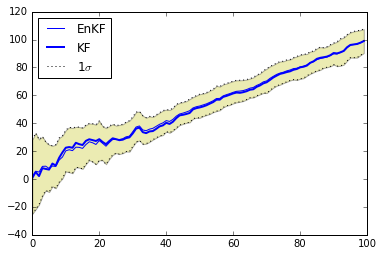

In [26]:
# import code.book_plots as bp
from numpy.random import randn
from filterpy.kalman import EnsembleKalmanFilter as EnKF
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

np.random.seed(1234)

def hx(x):
    return np.array([x[0]])

def fx(x, dt):
    return np.dot(F, x)
    
F = np.array([[1., 1.],[0., 1.]])

x = np.array([0., 1.])
P = np.eye(2) * 100.
enf = EnKF(x=x, P=P, dim_z=1, dt=1., N=20, hx=hx, fx=fx)

std_noise = 10.
enf.R *= std_noise**2
enf.Q = Q_discrete_white_noise(2, 1., .001)

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([x]).T
kf.F = F.copy()
kf.P = P.copy()
kf.R = enf.R.copy()
kf.Q = enf.Q.copy()
kf.H = np.array([[1., 0.]])

measurements = []
results = []
ps = []
kf_results = []

zs = []
for t in range (0,100):
    # create measurement = t plus white noise
    z = t + randn()*std_noise
    zs.append(z)

    enf.predict()
    enf.update(np.asarray([z]))
    
    kf.predict()
    kf.update(np.asarray([[z]]))

    # save data
    results.append (enf.x[0])
    kf_results.append (kf.x[0,0])
    measurements.append(z)
    ps.append(3*(enf.P[0,0]**.5))

results = np.asarray(results)
ps = np.asarray(ps)

plt.plot(results, label='EnKF')
plt.plot(kf_results, label='KF', c='b', lw=2)
# bp.plot_measurements(measurements)
plt.plot (results - ps, c='k',linestyle=':', lw=1, label='1$\sigma$')
plt.plot(results + ps, c='k', linestyle=':', lw=1)
plt.fill_between(range(100), results - ps, results + ps, facecolor='y', alpha=.3)
plt.legend(loc='best');

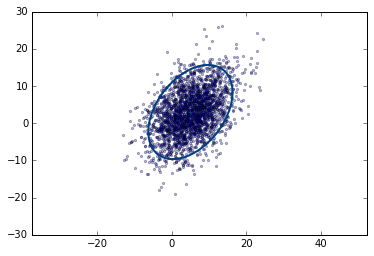

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal
from filterpy.stats import (covariance_ellipse, 
                            plot_covariance_ellipse)

mean = (5, 3)
P = np.array([[32, 15],
              [15., 40.]])

x,y = multivariate_normal(mean=mean, cov=P, size=2500).T
plt.scatter(x, y, alpha=0.3, marker='.')
plt.axis('equal')

plot_covariance_ellipse(mean=mean, cov=P,
                        variance=2.**2,
                        facecolor='none')

In [23]:
from code.book_plots import interactive_plot
import code.ekf_internal as ekf_internal

with interactive_plot():
    ekf_internal.show_linearization()

ImportError: No module named book_plots

In [8]:
#format the book
%matplotlib notebook
from __future__ import division, print_function
from book_format import load_style
load_style()

ImportError: No module named book_format

In [9]:
from numpy.random import randn
import copy
class PosSensor1(object):
    def __init__(self, pos=(0, 0), vel=(0, 0), noise_std=1.):
        self.vel = vel
        self.noise_std = noise_std
        self.pos = [pos[0], pos[1]]
        
    def read(self):
        self.pos[0] += self.vel[0]
        self.pos[1] += self.vel[1]
        
        return [self.pos[0] + randn() * self.noise_std,
                self.pos[1] + randn() * self.noise_std]

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import code.book_plots as bp

pos, vel = (4, 3), (2, 1)
sensor = PosSensor1(pos, vel, noise_std=1)
ps = np.array([sensor.read() for _ in range(50)])
plt.figure()
bp.plot_measurements(ps[:, 0], ps[:, 1]);

ImportError: No module named book_plots

In [2]:
import string

In [4]:
string.sring()

['2,3']

In [ ]:
pd.series(